In [1]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from read_files import read_kaldi_post
from read_files import read_kl
from plot_figures import plot_post

def read_phones(file_name):
    CLASSES_ARPABET = []
    with open (file_name, 'r') as k:
        l = k.readlines()
        for i in l: # phoneme
            CLASSES_ARPABET.append(i)
    return CLASSES_ARPABET

In [2]:
root = '/export/b13/xwang/kaldi/egs/magic_843_spk/s5'
lat_post_dir = root + '/phone_post/lat_phone_post_dev_20spk/'
ali_post_dir = root + '/phone_post/align_phone_post_dev_20spk/'
lat_refine_post_dir = root + '/phone_post/lat_phone_post_dev_20spk_refined/'
ali_refine_post_dir = root + '/phone_post/align_phone_post_dev_20spk_refined/'

example_name = '37_5622_20170914130136.wav'

lat_post_max = lat_post_dir + 'lat.2.phone.post.matrix' 
ali_post_max = ali_post_dir + 'lat.2.phone.post.matrix' 
lat_refine_post_max = lat_refine_post_dir + 'lat.2.phone.post.matrix' 
ali_refine_post_max = ali_refine_post_dir + 'lat.2.phone.post.matrix'

phone_list = root + '/phone_post/phone_post_mapping/phones.list'
phone_map = root + '/phone_post/phone_post_mapping/map_root_to_phone.map'
lat_post_eps = root + '/phone_post/phone_post_mapping/lat_post_max_new.eps'
ali_post_eps = root + '/phone_post/phone_post_mapping/ali_post_max_new.eps'
lat_post_refined_eps = root + '/phone_post/phone_post_mapping/lat_post_refined_max_new.eps'
ali_post_refined_eps = root + '/phone_post/phone_post_mapping/ali_post_refined_max_new.eps'
#kl_eps = root + '/post_kl.eps'
#epsilon = 10 ** (-10)

In [3]:
# read post
key = example_name
lat_post = read_kaldi_post.readKaldiPost(lat_post_max, 122)
ali_post = read_kaldi_post.readKaldiPost(ali_post_max, 122)

#lat_post_refined = read_kaldi_post.readKaldiPost(lat_refine_post_max, 122)
#ali_post_refined = read_kaldi_post.readKaldiPost(ali_refine_post_max, 122)

In [4]:
lat_ali_kl = root + '/phone_post/dev_20spk_alignment_vs_phoneme_skip_frame_th_1.1/KL_sys_medfilt_1_phone_window_0.2.txt'
lat_ali_kl_refined = root + '/phone_post/dev_20spk_refined_alignment_vs_phoneme_skip_frame_th_1.1/KL_sys_medfilt_1_phone_window_0.2.txt'

utt_kl1 = read_kl.read_kl(lat_ali_kl)

lat_ali_kl = root + '/phone_post/dev_20spk_alignment_vs_phoneme_skip_frame_th_1.1/KL_sys_medfilt_11_phone_window_0.2.txt'
lat_ali_kl_refined = root + '/phone_post/dev_20spk_refined_alignment_vs_phoneme_skip_frame_th_1.1/KL_sys_medfilt_11_phone_window_0.2.txt'

utt_kl2 = read_kl.read_kl(lat_ali_kl)

lat_ali_kl = root + '/phone_post/dev_20spk_alignment_vs_phoneme_skip_frame_th_1.1/KL_sys_medfilt_15_phone_window_0.2.txt'
lat_ali_kl_refined = root + '/phone_post/dev_20spk_refined_alignment_vs_phoneme_skip_frame_th_1.1/KL_sys_medfilt_15_phone_window_0.2.txt'

utt_kl3 = read_kl.read_kl(lat_ali_kl)

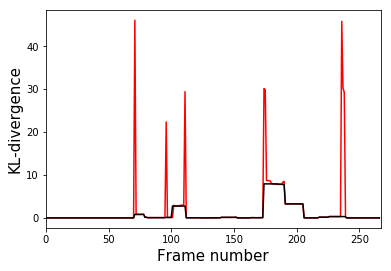

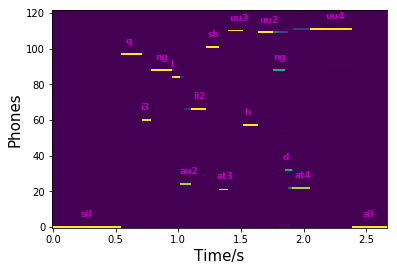

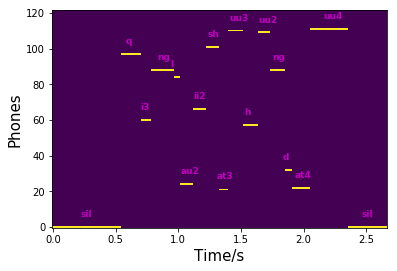

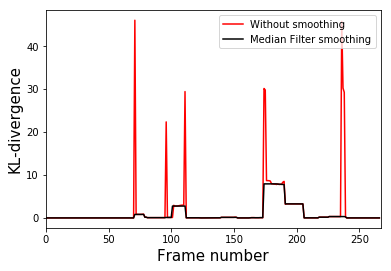

0.864132134094
2.04197942416


In [20]:
key = '38_5730_20170915093917.wav'#insertion
key = '38_5730_20170914194512.wav'#substitution
key = '38_5730_20170915101659.wav' #test
kl1 = utt_kl1[key].transpose()
kl2 = utt_kl2[key].transpose()
kl3 = utt_kl3[key].transpose()

lat_post_eps = root + '/phone_post/phone_post_mapping/lat_post_max_new'+ key + '.eps'
ali_post_eps = root + '/phone_post/phone_post_mapping/ali_post_max_new'+ key + '.eps'
plot_post.plotfigure(lat_post_eps, lat_post[key].T, read_phones(phone_list))
plt.gca().invert_yaxis()
plt.savefig(lat_post_eps)
plot_post.plotfigure(ali_post_eps, ali_post[key].T, read_phones(phone_list))
plt.gca().invert_yaxis()
plt.savefig(ali_post_eps)
plt.show()

plt.plot(kl1, 'r', ms = 6, label='Without smoothing')
#plt.plot(kl2, 'b', ms = 6)
plt.plot(kl3, 'k', ms = 6, label='Median Filter smoothing')
plt.xlabel('Frame number', fontsize=15)
plt.ylabel('KL-divergence', fontsize=15)
plt.xlim([0,len(kl1)])
plt.legend(loc='upper right')
kl_eps = root + '/phone_post/phone_post_mapping/kl'+ key + '.eps'
plt.savefig(kl_eps)
plt.show()



print(np.mean(kl3))
print(np.std(kl3))


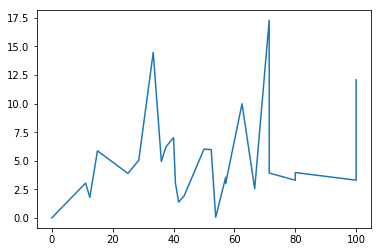

array([1, 2, 3, 0, 0, 4, 5, 6])